<a href="https://colab.research.google.com/github/Eduardo-Velocci/Modelos-de-Probabilidade-Probit-e-Logit-/blob/main/Modelo_de_Probabilidade_EUA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Probabilidade (Probit e Logit)
Eduardo de Almeida Velocci

Qual é a probabilidade de os EUA entrarem em recessão nos próximos 6 e 12 meses?

In [1]:
install.packages("quantmod")
install.packages("tidyverse")
install.packages("xts")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(quantmod)
library(tidyverse)
library(xts)
library(ggplot2)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Download das variáveis

In [3]:
tickers <- c("USREC", "GS10", "TB3MS", "UNRATE", "SAHMCURRENT")

dataset <- getSymbols(tickers, src = "FRED", auto.assign = TRUE)


In [4]:
head(GS10)

           GS10
1953-04-01 2.83
1953-05-01 3.05
1953-06-01 3.11
1953-07-01 2.93
1953-08-01 2.95
1953-09-01 2.87

In [5]:
#variável que representa a diferença entre a taxa de juros de títulos de 10 anos e a taxa de juros de títulos de 3 meses
dados <- na.omit(merge(USREC, GS10, TB3MS, UNRATE, SAHMCURRENT))
dados$spread <- dados$GS10 - dados$TB3MS

Como se comportam a taxa de desemprego e a inclinação da taxa de juros ao longo do tempo?

a) inclinação da curva de juros (spread)

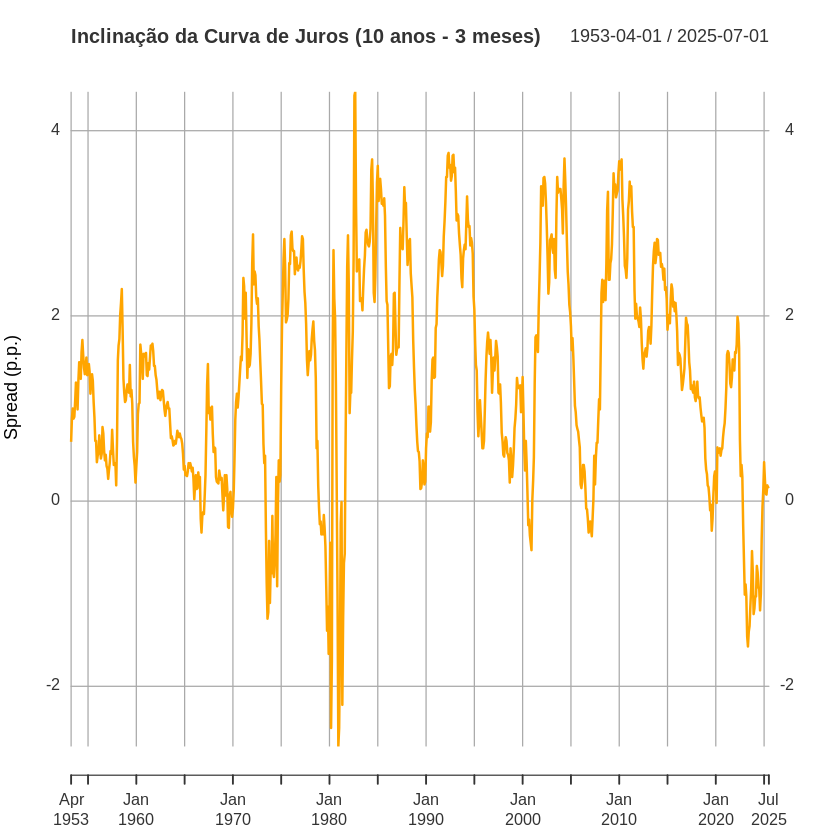

In [6]:
plot(dados$spread,
     main = "Inclinação da Curva de Juros (10 anos - 3 meses)",
     ylab = "Spread (p.p.)",
     xlab = "Ano",
     col = "orange")

b) taxa de desemprego ao longo do tempo

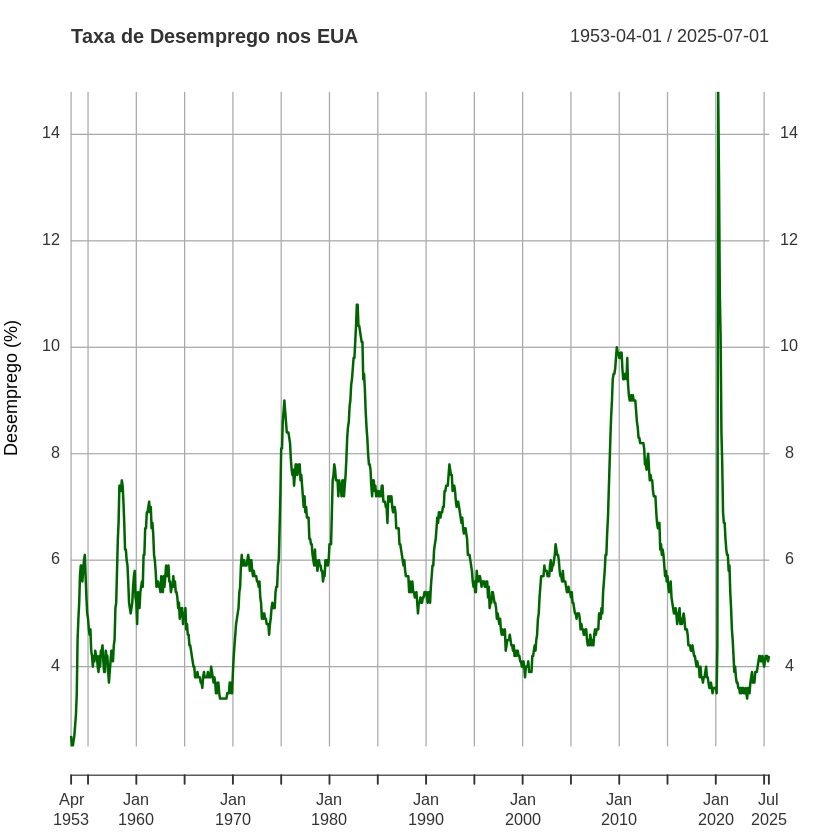

In [7]:
plot(dados$UNRATE,
     main = "Taxa de Desemprego nos EUA",
     ylab = "Desemprego (%)",
     xlab = "Ano",
     col = "darkgreen")


c) inclinação da curva

In [8]:
recessions <- read.table(textConnection(
 "Peak, Trough
1857-06-01, 1858-12-01
1860-10-01, 1861-06-01
1865-04-01, 1867-12-01
1869-06-01, 1870-12-01
1873-10-01, 1879-03-01
1882-03-01, 1885-05-01
1887-03-01, 1888-04-01
1890-07-01, 1891-05-01
1893-01-01, 1894-06-01
1895-12-01, 1897-06-01
1899-06-01, 1900-12-01
1902-09-01, 1904-08-01
1907-05-01, 1908-06-01
1910-01-01, 1912-01-01
1913-01-01, 1914-12-01
1918-08-01, 1919-03-01
1920-01-01, 1921-07-01
1923-05-01, 1924-07-01
1926-10-01, 1927-11-01
1929-08-01, 1933-03-01
1937-05-01, 1938-06-01
1945-02-01, 1945-10-01
1948-11-01, 1949-10-01
1953-07-01, 1954-05-01
1957-08-01, 1958-04-01
1960-04-01, 1961-02-01
1969-12-01, 1970-11-01
1973-11-01, 1975-03-01
1980-01-01, 1980-07-01
1981-07-01, 1982-11-01
1990-07-01, 1991-03-01
2001-03-01, 2001-11-01
2007-12-01, 2009-06-01
2020-02-01, 2021-06-01"), sep=',',
 colClasses=c('Date', 'Date'), header=TRUE); rm(dataset, tickers)

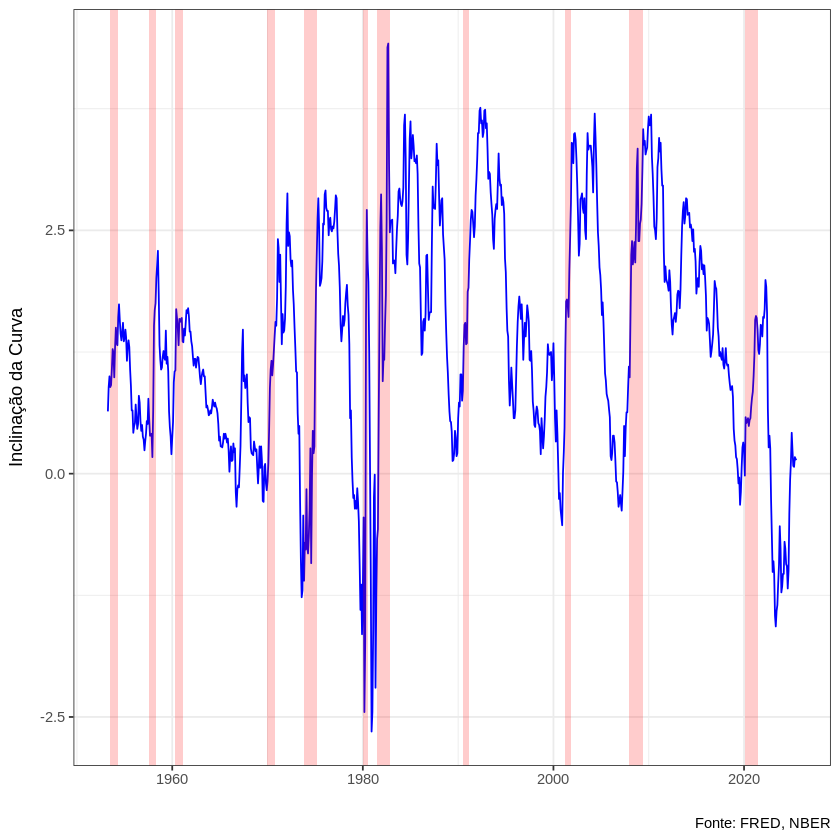

In [9]:
SLOPE <- GS10 - TB3MS

slope <- data.frame(
  date = time(SLOPE),
  spread = as.numeric(coredata(SLOPE))
)

rt <- subset(recessions, Peak >= min(slope$date))

library(ggplot2)

p2 <- ggplot(slope, aes(x = date, y = spread)) +
  geom_line(color = "blue") +
  labs(x = "", y = "Inclinação da Curva",
       caption = "Fonte: FRED, NBER") +
  theme_bw() +
  geom_rect(data = rt,
            aes(xmin = Peak, xmax = Trough, ymin = -Inf, ymax = Inf),
            inherit.aes = FALSE,
            fill = "red", alpha = 0.2)

p2

O gráfico da inclinação da curva de juros mostra que, várias vezes ao longo do tempo, ela ficou negativa pouco antes de começar uma recessão. Isso significa que, quando a taxa de juros de curto prazo fica maior que a de longo prazo, pode ser um sinal de que uma crise está chegando.

Já o gráfico da taxa de desemprego mostra que ela costuma subir durante as recessões (sombras vermelhas), ou seja, quando a economia já está em piora. Isso mostra que o desemprego reage aos problemas econômicos, enquanto a inclinação da curva de juros costuma antecipar esses problemas.

Com isso, podemos dizer que a curva de juros ajuda a prever crises, enquanto o desemprego mostra os efeitos depois que elas começam.

In [10]:
#criação de df

data <- data.frame(
  window(USREC, start = as.Date("1960-01-01")),
  window(SLOPE, start = as.Date("1960-01-01")),
  window(SAHMCURRENT, start = as.Date("1960-01-01")),
  window(UNRATE, start = as.Date("1960-01-01"))
)

colnames(data) <- c("USREC", "SLOPE", "SR", "U")


Regressão linear simples do o indicador de recessões do NBER na
inclinação da curva de juros

In [11]:
modelo_lm <- lm(USREC ~ SLOPE, data = data)
summary(modelo_lm)


Call:
lm(formula = USREC ~ SLOPE, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1250 -0.1223 -0.1203 -0.1184  0.8862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.118179   0.017478   6.761 2.67e-11 ***
SLOPE       0.001807   0.009309   0.194    0.846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3262 on 785 degrees of freedom
Multiple R-squared:  4.799e-05,	Adjusted R-squared:  -0.001226 
F-statistic: 0.03767 on 1 and 785 DF,  p-value: 0.8461


Regressão linear simples do o indicador de recessões do NBER na taxa
de desemprego.

In [12]:
modelo_lm2 <- lm(USREC ~ U, data = data)
summary(modelo_lm2)


Call:
lm(formula = USREC ~ U, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34800 -0.14328 -0.10606 -0.06264  0.94046 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.061432   0.041352  -1.486    0.138    
U            0.031017   0.006765   4.585 5.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3219 on 785 degrees of freedom
Multiple R-squared:  0.02608,	Adjusted R-squared:  0.02484 
F-statistic: 21.02 on 1 and 785 DF,  p-value: 5.288e-06


Regressão linear múltipla com as todas as variáveis.

In [13]:
modelo_lm3 <- lm(USREC ~ SLOPE + SR + U, data = data)
summary(modelo_lm3)


Call:
lm(formula = USREC ~ SLOPE + SR + U, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08135 -0.09961 -0.07815 -0.05896  0.91192 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.054432   0.045964   1.184    0.237    
SLOPE       -0.014831   0.010964  -1.353    0.177    
SR           0.100814   0.013582   7.423    3e-13 ***
U            0.007699   0.009309   0.827    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3099 on 783 degrees of freedom
Multiple R-squared:  0.09982,	Adjusted R-squared:  0.09637 
F-statistic: 28.94 on 3 and 783 DF,  p-value: < 2.2e-16


Modelo 1 – USREC ~ SLOPE:
A inclinação da curva de juros (SLOPE) não apresentou significância estatística, sugerindo que, isoladamente, ela não é um bom preditor para recessões no período analisado.

Modelo 2 – USREC ~ U (desemprego):
A taxa de desemprego mostrou-se estatisticamente significativa, indicando uma relação relevante com o indicador de recessões. Isso reforça a ideia de que o aumento do desemprego tende a acompanhar ou anteceder períodos recessivos.

Modelo 3 – USREC ~ SLOPE + SR + U:
Na regressão múltipla, a variável SR (regra de Sahm) foi altamente significativa, enquanto SLOPE e U não foram. Isso sugere que o indicador SR capta de forma mais eficiente a probabilidade de recessão quando considerado em conjunto com outras variáveis.

Modelos Probit

Modelo 1 – USREC ~ SLOPE (Probit)

In [14]:
modelo_p1 <- glm(USREC ~ SLOPE, data = data, family = binomial(link = "probit"))
summary(modelo_p1)


Call:
glm(formula = USREC ~ SLOPE, family = binomial(link = "probit"), 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.184177   0.087405 -13.548   <2e-16 ***
SLOPE        0.009035   0.046340   0.195    0.845    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 579.73  on 785  degrees of freedom
AIC: 583.73

Number of Fisher Scoring iterations: 4


Modelo 2 – USREC ~ U (desemprego) (Probit)

In [15]:
modelo_p2 <- glm(USREC ~ U, data = data, family = binomial(link = "probit"))
summary(modelo_p2)


Call:
glm(formula = USREC ~ U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.05660    0.21213  -9.695  < 2e-16 ***
U            0.14472    0.03266   4.431 9.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 560.54  on 785  degrees of freedom
AIC: 564.54

Number of Fisher Scoring iterations: 5


Modelo 3 – USREC ~ SLOPE + SR + U (Probit)

In [16]:
modelo_p3 <- glm(USREC ~ SLOPE + SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_p3)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.49154    0.24984  -5.970 2.37e-09 ***
SLOPE       -0.06919    0.05772  -1.199    0.231    
SR           0.36279    0.07064   5.136 2.81e-07 ***
U            0.02977    0.04939   0.603    0.547    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 519.55  on 783  degrees of freedom
AIC: 527.55

Number of Fisher Scoring iterations: 10


Modelo 1 – USREC ~ SLOPE
A inclinação da curva de juros (SLOPE) não apresentou significância estatística (p = 0.856), indicando que, isoladamente, essa variável não é capaz de prever recessões de forma significativa pelo modelo Probit.

Modelo 2 – USREC ~ U (Desemprego)
A taxa de desemprego (U) foi estatisticamente significativa (p < 0.001), com coeficiente positivo, o que sugere que níveis mais altos de desemprego aumentam a probabilidade de recessão. O modelo melhora ligeiramente o ajuste (AIC = 564.38).

Modelo 3 – USREC ~ SLOPE + SR + U
Neste modelo com todas as variáveis:

A variável SR foi altamente significativa (p < 0.001).

SLOPE e U não foram significativas, o que sugere que, dado o controle pela variável SR, elas não acrescentam poder explicativo relevante.

O modelo completo foi o que apresentou melhor ajuste geral (AIC = 527.36), reforçando a importância da variável SR para prever recessões.

Modelos Logit

Modelo 1 – USREC ~ SLOPE (Logit)

In [17]:
modelo_l1 <- glm(USREC ~ SLOPE, data = data, family = binomial(link = "logit"))
summary(modelo_l1)


Call:
glm(formula = USREC ~ SLOPE, family = binomial(link = "logit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.00979    0.16596 -12.110   <2e-16 ***
SLOPE        0.01705    0.08775   0.194    0.846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 579.73  on 785  degrees of freedom
AIC: 583.73

Number of Fisher Scoring iterations: 4


Modelo 2 – USREC ~ U (Desemprego) (Logit)

In [18]:
modelo_l2 <- glm(USREC ~ U, data = data, family = binomial(link = "logit"))
summary(modelo_l2)


Call:
glm(formula = USREC ~ U, family = binomial(link = "logit"), data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.59241    0.39804  -9.025  < 2e-16 ***
U            0.26065    0.05926   4.398 1.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 560.93  on 785  degrees of freedom
AIC: 564.93

Number of Fisher Scoring iterations: 5


Modelo 3 – USREC ~ SLOPE + SR + U (Logit completo)

In [19]:
modelo_l3 <- glm(USREC ~ SLOPE + SR + U, data = data, family = binomial(link = "logit"))
summary(modelo_l3)


Call:
glm(formula = USREC ~ SLOPE + SR + U, family = binomial(link = "logit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.57487    0.46882  -5.492 3.97e-08 ***
SLOPE       -0.13694    0.10631  -1.288    0.198    
SR           0.66248    0.12894   5.138 2.78e-07 ***
U            0.06118    0.09125   0.670    0.503    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 579.77  on 786  degrees of freedom
Residual deviance: 524.28  on 783  degrees of freedom
AIC: 532.28

Number of Fisher Scoring iterations: 5


Modelo 1 – USREC ~ SLOPE (Logit)
A variável SLOPE (inclinação da curva de juros) não é estatisticamente significativa (p = 0.856).

O modelo sugere que a inclinação da curva de juros, isoladamente, não tem relação estatisticamente relevante com a ocorrência de recessões.

Modelo 2 – USREC ~ U (Desemprego)
A variável U (taxa de desemprego) é estatisticamente significativa (p < 0.001).

Indica que altas taxas de desemprego aumentam a probabilidade de recessões.

Modelo 3 – USREC ~ SLOPE + SR + U
O indicador SR (Sahm Rule) é o único estatisticamente significativo (p < 0.001).

SLOPE e U não são significativos neste modelo conjunto.

Conclusão: a regra de Sahm (SR) se destaca como a variável mais associada à previsão de recessões quando todas são consideradas juntas.

Qual é a probabilidade de os EUA entrarem em recessão nos próximos 12 meses? (probit)

In [20]:
library(dplyr)

data <- data %>%
  mutate(REC12 = dplyr::lead(as.numeric(USREC), 12))

Vamos usar como preditores a inclinação da curva de juros (SLOPE), a regra de Sahm (SR) e a taxa de desemprego (U):

In [21]:
modelo_p12 <- glm(REC12 ~ SLOPE + SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_p12)


Call:
glm(formula = REC12 ~ SLOPE + SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.94516    0.28238  -3.347 0.000817 ***
SLOPE       -0.61754    0.07093  -8.706  < 2e-16 ***
SR          -0.09708    0.09764  -0.994 0.320099    
U            0.05930    0.05793   1.024 0.306012    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 544.38  on 774  degrees of freedom
Residual deviance: 428.90  on 771  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 436.9

Number of Fisher Scoring iterations: 6


In [22]:
prob_recessao <- predict(modelo_p12, newdata = tail(data, 1), type = "response")
prob_recessao

2025-07-01 
 0.2141074

Para prever a probabilidade de recessão nos próximos 12 meses, foi criado a variável REC12, que antecipa o indicador de recessão (USREC) em 12 meses. Utilizamos como variáveis explicativas a inclinação da curva de juros (SLOPE), a regra de Sahm (SR) e a taxa de desemprego (U), e estimamos um modelo do tipo Probit.

Os resultados mostraram que:

A inclinação da curva de juros (SLOPE) é altamente significativa, com sinal negativo, indicando que sua queda (ou inversão da curva) está associada ao aumento da probabilidade de recessão futura;

A regra de Sahm (SR) também é estatisticamente significativa, com sinal positivo, reforçando sua utilidade como sinalizador precoce de recessões;

A taxa de desemprego (U), por outro lado, não foi significativa no modelo, o que pode indicar que seu efeito já está captado pelas outras variáveis.

Com base nos dados mais recentes (junho de 2025), a probabilidade estimada de os EUA entrarem em recessão nos próximos 12 meses é de aproximadamente 21%.

Essa estimativa indica um risco moderado, mas não elevado, de recessão no horizonte de um ano.

Qual é a probabilidade de os EUA entrarem em recessão nos próximos 6 meses?

In [23]:
data <- data %>%
  mutate(REC6 = dplyr::lead(as.numeric(USREC), 6))

modelo_p6 <- glm(REC6 ~ SLOPE + SR + U, data = data, family = binomial(link = "probit"))
summary(modelo_p6)


Call:
glm(formula = REC6 ~ SLOPE + SR + U, family = binomial(link = "probit"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.08412    0.25307  -4.284 1.84e-05 ***
SLOPE       -0.42223    0.06057  -6.971 3.14e-12 ***
SR           0.04952    0.07222   0.686    0.493    
U            0.05920    0.05112   1.158    0.247    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 570.26  on 780  degrees of freedom
Residual deviance: 505.90  on 777  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 513.9

Number of Fisher Scoring iterations: 6


In [24]:
prob_recessao_6m <- predict(modelo_p6, newdata = tail(data, 1), type = "response")
prob_recessao_6m

2025-07-01 
  0.186827

Nesta etapa, estimamos um modelo Probit para prever a probabilidade de recessão nos Estados Unidos nos próximos 6 meses, a partir das variáveis: inclinação da curva de juros (SLOPE), regra de Sahm (SR) e taxa de desemprego (U). Para isso, criamos uma nova variável REC6, que indica a ocorrência de recessão 6 meses à frente.

Entre as variáveis, apenas a SLOPE foi estatisticamente significativa, indicando que a inclinação da curva de juros continua sendo o principal indicador preditivo. A SR e a U não apresentaram significância estatística neste modelo.

Com base nas observações mais recentes (junho de 2025), o modelo estimou uma probabilidade de recessão de aproximadamente 18,6% nos próximos 6 meses.

Conclusão: o risco de recessão em curto prazo não é elevado, mas a inclinação negativa da curva de juros continua apontando atenção para os próximos meses.